Zadanie 1.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

def initial_probability_vector(d):
    return np.ones(d) * 0.5

def binary_random(p):
    if np.random.random() < p:
        return 1
    return 0

def random_individual(p, d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = binary_random(p[i])
    return x

def random_population(p, d, n):
    P = np.zeros((n, d))
    for i in range(n):
        P[i] = random_individual(p, d)
    return P

def population_evaluation(P, F, n):
    res = np.zeros(n)
    for i in range(n):
        res[i] = F(P[i])
    return res

In [28]:
def pbil( F, n, d, theta1, theta2, theta3, iterations = 3000 ):
    VP = initial_probability_vector(d)
    POP = random_population(VP, d, n)
    reschange = np.zeros(iterations)
    for i in range(iterations):
        E = population_evaluation(POP, F, n)
        bi = E.argmax() #best individual
        VP = VP * (1.0 - theta1) + POP[bi] * theta1
        
        reschange[i] = E[bi]
        #if i % 1000 == 0:
        #    print("best individual:", bi, ", E[bi]:", POP[bi])
        #    print("prob vector:{}", VP)
        
        for k in range(d):
            if np.random.random() < theta2:
                VP[k] = VP[k] * (1.0 - theta3) + binary_random(0.5) * theta3
        POP = random_population(VP, d, n)
        #if i % 1000 == 0:
        #    print( i )
        #    print( VP )
        #    print( POP )
    return VP, reschange
        
def CGA( F, d, theta, iterations = 3000 ):
    VP = initial_probability_vector(d)
    reschange = np.zeros(iterations)
    for i in range(iterations):
        x1 = random_individual(VP, d)
        x2 = random_individual(VP, d)
        e1 = F( x1 )
        e2 = F( x2 )
        if e2 > e1: # x1 - best individual
            x1, x2 = x2, x1
        
        for k in range( d ):
            if x1[k] == 1 and x2[k] == 0:
                VP[k] = VP[k] + theta
            if x1[k] == 0 and x2[k] == 1:
                VP[k] = VP[k] - theta

        reschange[i] = max(e1, e2)
            
    return VP, reschange

def model_estimation( PS ):
    m = PS.shape[0]
    return ( 1.0 / m ) * np.sum( PS, axis = 0 )

def UMDA( F, n, d, m, iterations = 3000 ):
    VP = initial_probability_vector(d)
    reschange = np.zeros(iterations)
    for i in range(iterations):
        POP = random_population(VP, d, n)
        E = population_evaluation(POP, F, n)
        PS = POP[ (np.argsort(E)[::-1])[:m] ] # best m individuals from population
        reschange[i] = F( PS[0] )
        VP = model_estimation( PS )
    return VP, reschange


In [29]:
def onemax(V):
    return np.count_nonzero(V == 1)

def deceptiveonemax(V):
    if np.count_nonzero(V == 0) == V.shape[0]:
        return V.shape[0] + 1
    return np.count_nonzero(V == 1)

def kdeceptiveonemax(V):
    k = 10
    res = 0
    for i in range(int(V.shape[0] / k)):
        #print(i*k, (i+1) * k)
        res += deceptiveonemax(V[i*k:(i+1) * k])
    return res

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99 1.   1.
 1.   0.99 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99 1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99 1.   1.   1.   1.
 1.   1.  ]
[0.999963   1.         1.         1.         1.         0.99999981
 0.99998567 1.         0.99831197 1.         0.99999989 0.99999445
 1.         0.99999999 0.99998953 0.99999734 1.         0.9999999

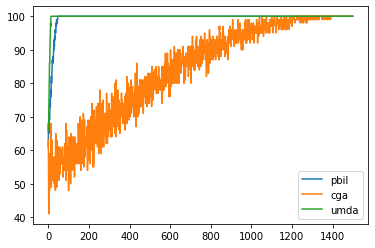

In [35]:
umdavponemax, umdaresonemax = UMDA( onemax, 200, 100, 100, iterations = 1500 )
print( umdavponemax )

cgavponemax, cgaresonemax = CGA( onemax, 100, 0.01, iterations = 1500 )
print( cgavponemax )

pbilvponemax, pbilresonemax = pbil( onemax, 200, 100, 0.1, 0.01, 0.1, iterations = 1500)
print( pbilvponemax )

plt.plot(pbilresonemax, label='pbil')
plt.plot(cgaresonemax, label='cga')
plt.plot(umdaresonemax, label='umda')
plt.legend()
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
umda time 91.40259552001953
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
cga time 1.4400355815887451
[1.         1.         1.         0.99282102 0.99962429 1.
 0.99797234 0.99999968 1.         1.         1.         0.99999998
 0.9961848  0.99816965 0.99835768 1.         1.         0.99998955
 0.99418503 0.99999997 0.99999784 0.97175703 1.         0.99997295
 0.99999569 0.91       1.         0.99934141 1.         0.99999154
 0.99

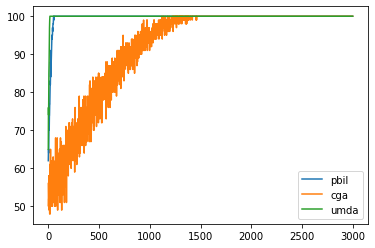

In [36]:
t0 = time.time()
umdavpdeceptive, umdaresdeceptive = UMDA( deceptiveonemax, 200, 100, 100 )
print( umdavpdeceptive )
print(f"umda time {time.time() - t0}")

t0 = time.time()
cgavpdeceptive, cgaresdeceptive = CGA( deceptiveonemax, 100, 0.01 )
print( cgavpdeceptive )
print(f"cga time {time.time() - t0}")

t0 = time.time()
pbilvpdeceptive, pbilresdeceptive = pbil( deceptiveonemax, 100, 100, 0.1, 0.01, 0.1 )
print( pbilvpdeceptive )
print(f"pbil time {time.time() - t0}")

plt.plot(pbilresdeceptive, label='pbil')
plt.plot(cgaresdeceptive, label='cga')
plt.plot(umdaresdeceptive, label='umda')
plt.legend()
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1.         0.99997282 0.99576088 1.         0.99690283 1.
 0.98961485 1.         1.         0.99999997 0.99998034 0.99999994
 0.99985287 0.99999999 0.99656632 1.         1.         1.
 0.99880182 0.92709907 0.99999964 1.         0.91       1.
 1.         0.99957699 1.         1.         0.97712146 0.940951
 1.         0.99999998 0.91823706 1.         0.99980033 1.
 0.99999899 0.983322

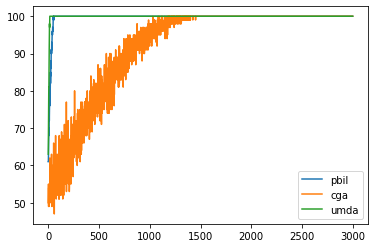

In [33]:
umdavpkdeceptive, umdareskdeceptive = UMDA( kdeceptiveonemax, 200, 100, 100 )
print( umdavpkdeceptive )

cgavpkdeceptive, cgareskdeceptive = CGA( kdeceptiveonemax, 100, 0.01 )
print( cgavpkdeceptive )

pbilvpkdeceptive, pbilreskdeceptive = pbil( kdeceptiveonemax, 100, 100, 0.1, 0.01, 0.1 )
print( pbilvpkdeceptive )

plt.plot(pbilreskdeceptive, label='pbil')
plt.plot(cgareskdeceptive, label='cga')
plt.plot(umdareskdeceptive, label='umda')
plt.legend()
plt.show()

Zadanie 2.